# Association Rule 2- Titanic Passenger

In [1]:
!pip install mlxtend

In [2]:
# import the Libraries
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt   
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

# association rule
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
# import dataset
# t = pd.read_csv('test.csv')
t = pd.read_csv('train.csv')
t.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
t.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
t.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# replace null values with 'Unknown' in Embarked
t['Embarked'].fillna('Unknown',inplace=True)

In [8]:
# replace null values with 0 in Age
t['Age'].fillna(0, inplace=True)
# set Age as Integer
t['Age'] = t['Age'].astype('int')  

In [9]:
# replacing binary with string values
replace = {0: "Died", 1: "Survived"}
t.replace({'Survived' : replace}, inplace=True)

In [10]:
# remove the null values in Cabin
t = t.dropna(subset=['Cabin'])

In [11]:
#grp columns
catgrp_cols = ['Survived','Pclass','Sex', 'Age', 'Embarked']

In [12]:
t.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
t.head()

PassengerId  Survived  Pclass  \
1             2  Survived       1   
3             4  Survived       1   
6             7      Died       1   
10           11  Survived       3   
11           12  Survived       1   

                                                 Name     Sex  Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
6                             McCarthy, Mr. Timothy J    male   54      0   
10                    Sandstrom, Miss. Marguerite Rut  female    4      1   
11                           Bonnell, Miss. Elizabeth  female   58      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S

In [14]:
t.shape

(204, 12)

Survived    136
Died         68
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

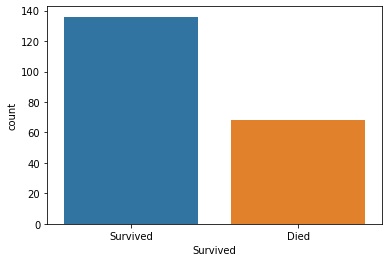

In [15]:
#Number of 'Survived'
print(t['Survived'].value_counts())
sns.countplot(x="Survived", data=t)

male      107
female     97
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

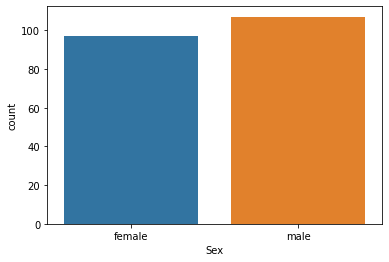

In [16]:
#Number of passenger by 'Sex'
print(t['Sex'].value_counts())
sns.countplot(x="Sex", data=t)

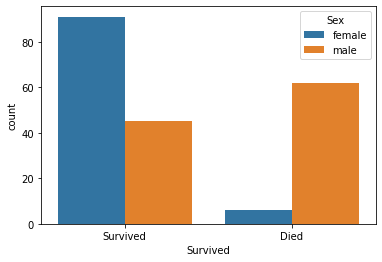

In [17]:
ax = sns.countplot(x="Survived", hue="Sex", data=t)

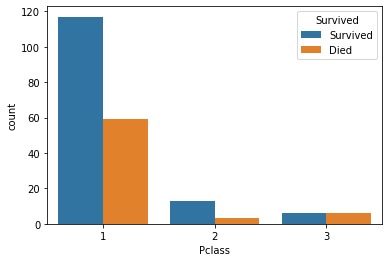

In [20]:
ax = sns.countplot(x="Pclass", hue="Survived", data=t)

# Data Preparation

In [19]:
grp_titanic = t[catgrp_cols]
grp_titanic.head()

Survived  Pclass     Sex  Age Embarked
1   Survived       1  female   38        C
3   Survived       1  female   35        S
6       Died       1    male   54        S
10  Survived       3  female    4        S
11  Survived       1  female   58        S

In [20]:
grp_titanic.shape

(204, 5)

Convert the data from dataframe into list of lists format

In [21]:
records = []
for i in range(0, 204):
    records.append([str(grp_titanic.values[i,j]) for j in range(0, 5)])

In [22]:
titanicgrp = TransactionEncoder()
titanicgrp_array = titanicgrp.fit(records).transform(records)
titanic = pd.DataFrame(titanicgrp_array, columns=titanicgrp.columns_)
titanic.head()

0      1     11     14     15     16     17     18     19      2  ...  \
0  False   True  False  False  False  False  False  False  False  False  ...   
1  False   True  False  False  False  False  False  False  False  False  ...   
2  False   True  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False   True  False  False  False  False  False  False  False  False  ...   

      71     80      C   Died      Q      S  Survived  Unknown  female   male  
0  False  False   True  False  False  False      True    False    True  False  
1  False  False  False  False  False   True      True    False    True  False  
2  False  False  False   True  False   True     False    False   False   True  
3  False  False  False  False  False   True      True    False    True  False  
4  False  False  False  False  False   True      True    False    True  False  

[5 rows x 68 columns]

Using lambda function.

False = 0 <br>
True = 1

In [23]:
titanic = titanic.applymap(lambda x: 1 if x>0 else 0)

titanic.head()

0  1  11  14  15  16  17  18  19  2  ...  71  80  C  Died  Q  S  Survived  \
0  0  1   0   0   0   0   0   0   0  0  ...   0   0  1     0  0  0         1   
1  0  1   0   0   0   0   0   0   0  0  ...   0   0  0     0  0  1         1   
2  0  1   0   0   0   0   0   0   0  0  ...   0   0  0     1  0  1         0   
3  0  0   0   0   0   0   0   0   0  0  ...   0   0  0     0  0  1         1   
4  0  1   0   0   0   0   0   0   0  0  ...   0   0  0     0  0  1         1   

   Unknown  female  male  
0        0       1     0  
1        0       1     0  
2        0       0     1  
3        0       1     0  
4        0       1     0  

[5 rows x 68 columns]

# Implementing Apriori algorithm

In [24]:
frequent_grpsets = apriori(titanic, min_support=0.06, use_colnames=titanicgrp.columns_)
frequent_grpsets.head()

support itemsets
0  0.098039      (0)
1  0.867647      (1)
2  0.088235      (2)
3  0.063725      (3)
4  0.338235      (C)

# Association Rule

In [25]:
# setting the threshold of Lift Value as 1
rules = association_rules(frequent_grpsets, metric="lift", min_threshold=1)  
rules.head()

antecedents consequents  antecedent support  consequent support   support  \
0         (S)         (0)            0.632353            0.098039  0.068627   
1         (0)         (S)            0.098039            0.632353  0.068627   
2         (0)      (male)            0.098039            0.524510  0.063725   
3      (male)         (0)            0.524510            0.098039  0.063725   
4         (1)         (C)            0.867647            0.338235  0.323529   

   confidence      lift  leverage  conviction  
0    0.108527  1.106977  0.006632    1.011765  
1    0.700000  1.106977  0.006632    1.225490  
2    0.650000  1.239252  0.012303    1.358543  
3    0.121495  1.239252  0.012303    1.026700  
4    0.372881  1.102432  0.030061    1.055246

In [26]:
# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules)
plt.show()

In [27]:
rules[ (rules['lift'] >= 1.50) & (rules['confidence'] >= 0.8) ]   

antecedents    consequents  antecedent support  consequent support  \
23         (Died)         (male)            0.333333            0.524510   
56      (1, Died)         (male)            0.289216            0.524510   
59         (Died)      (male, 1)            0.333333            0.470588   
73      (Died, C)         (male)            0.083333            0.524510   
85      (S, Died)         (male)            0.240196            0.524510   
98   (1, Died, C)         (male)            0.078431            0.524510   
102     (Died, C)      (male, 1)            0.083333            0.470588   
111   (female, C)  (1, Survived)            0.181373            0.578431   
128  (S, 1, Died)         (male)            0.205882            0.524510   
132     (S, Died)      (male, 1)            0.240196            0.470588   

      support  confidence      lift  leverage  conviction  
23   0.303922    0.911765  1.738318  0.129085    5.388889  
56   0.274510    0.949153  1.809599  0.122813    9.351307  
59   0.274510    0.823529  1.750000  0.117647    3.000000  
73   0.078431    0.941176  1.794393  0.034722    8.083333  
85   0.215686    0.897959  1.711997  0.089701    4.659804  
98   0.073529    0.937500  1.787383  0.032391    7.607843  
102  0.073529    0.882353  1.875000  0.034314    4.500000  
111  0.166667    0.918919  1.588639  0.061755    5.199346  
128  0.196078    0.952381  1.815754  0.088091    9.985294  
132  0.196078    0.816327  1.734694  0.083045    2.882353